# Marie Tabourin 02005176
# Xinyue Jiang 11913955

In [3]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from datetime import date, timedelta, datetime
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# 1. Sur la base de données Mouse

## Téléchargement du jeu de données

In [4]:
data = pd.read_csv('./mouse.txt', sep=' ', header = None)
df=pd.DataFrame(data)
data.head()

,0,1
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470


## Analyse des données

(500, 2)


(array([[  1.,  30.,  72.,  51.,  72.,  66.,  63.,  77.,  57.,  11.],
        [  0.,   1.,  14.,  47.,  72.,  67.,  65., 122., 105.,   7.]]),
 array([0.04055493, 0.12810242, 0.2156499 , 0.30319739, 0.39074488,
        0.47829237, 0.56583986, 0.65338734, 0.74093483, 0.82848232,
        0.91602981]),
 <a list of 2 BarContainer objects>)

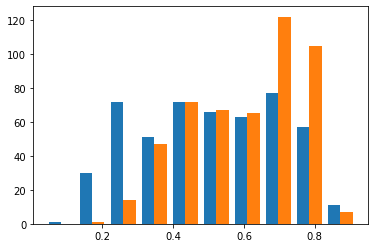

In [5]:
print(np.shape(data))
plt.hist(data)

## Graphique des données

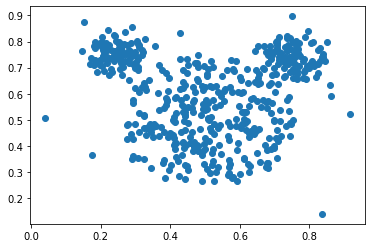

In [6]:
plt.scatter(data[0], data[1])

#### Les données correspondent à 500 coordonnées représentant une tête de souris. On peut observer qu'une dizaine de points ne sont pas très bien positionnées par rapport à la tête de souris et semblent donc être des anomalies.

## Détection des anomalies

In [7]:
clf = IsolationForest(random_state=0)
clf.fit(data.values)
dec=clf.decision_function(data)

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  4.,  2.,
         2.,  1.,  3.,  3.,  1.,  6., 10., 12.,  6., 10.,  6., 19., 23.,
        26., 13., 20., 31., 35., 48., 48., 62., 50., 26., 18.]),
 array([-0.22181541, -0.2161612 , -0.21050699, -0.20485278, -0.19919857,
        -0.19354436, -0.18789014, -0.18223593, -0.17658172, -0.17092751,
        -0.1652733 , -0.15961909, -0.15396488, -0.14831067, -0.14265646,
        -0.13700225, -0.13134804, -0.12569383, -0.12003962, -0.11438541,
        -0.1087312 , -0.10307699, -0.09742278, -0.09176857, -0.08611436,
        -0.08046015, -0.07480594, -0.06915173, -0.06349752, -0.05784331,
        -0.0521891 , -0.04653489, -0.04088068, -0.03522647, -0.02957226,
        -0.02391805, -0.01826384, -0.01260962, -0.00695541, -0.0013012 ,
         0.00435301,  0.01000722,  0.01566143,  0.02131564,  0.02696985,
         0.03262406,  0.03827827,  0.04393248,  0.04958669,

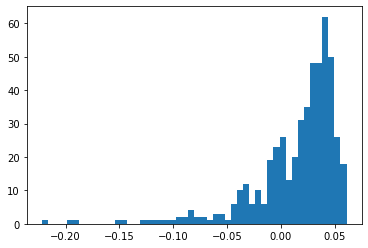

In [8]:
plt.hist(dec,bins = 50)

#### Cet histogramme représente la quantité de coordonées qui possède chaque score données par Isolation Forest.
#### On observe que presque tous les coordonnées ont un scores autour de 0.025 mais certains coordonnées se démarques avec des scores plus faibles et sont donc potentiellement des anomalies
#### Nous avons choisis, d'après cet histogramme, que toutes les coordonnées avec un score en dessous de -0.10 correspondent à des anomalies

In [9]:
# tous les scores inférieurs à -0.10 sont changés en 0 et ceux supérieurs en 1
list_dec = []
for i in dec:
    if i < -0.10:
        list_dec.append(0)
    if i >= -0.10:
        list_dec.append(1)


# On rajoute une colonne aux données avec 0 pour anomalies et 1 pour non anomalies
list_dec_np = np.array(list_dec).reshape(-1,1)
data_dec_cont = np.concatenate((data, list_dec_np), axis=1)
data_dec_cont = pd.DataFrame(data_dec_cont)

In [10]:
# Création d'un tableau avec seulement les anomalies et l'autres avec seulement les non anomalies
index1 = data_dec_cont[ data_dec_cont[2] == 1 ].index
data_anom = data_dec_cont.drop(index1)
print(np.shape(data_anom))

index0 = data_dec_cont[ data_dec_cont[2] == 0 ].index
data_non_anom = data_dec_cont.drop(index0)

(11, 3)


#### Nous avons trouvé 11 anomalies

## Représentation graphique avec visualisation des anomalies

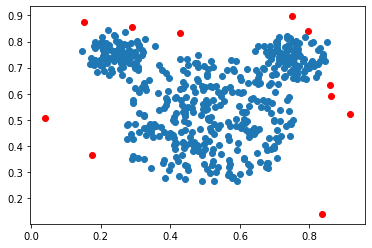

In [11]:
# plot des anomalies
plt.scatter(data_anom[0], data_anom[1], c = "red")
# plot des autres coordonnées
plt.scatter(data_non_anom[0], data_non_anom[1])

# 2. Sur le jeu de données des cartes de crédits

## Téléchargement des données

In [63]:
data2 = pd.read_csv('./creditcard.csv', sep=',')
df2=pd.DataFrame(data2)
data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


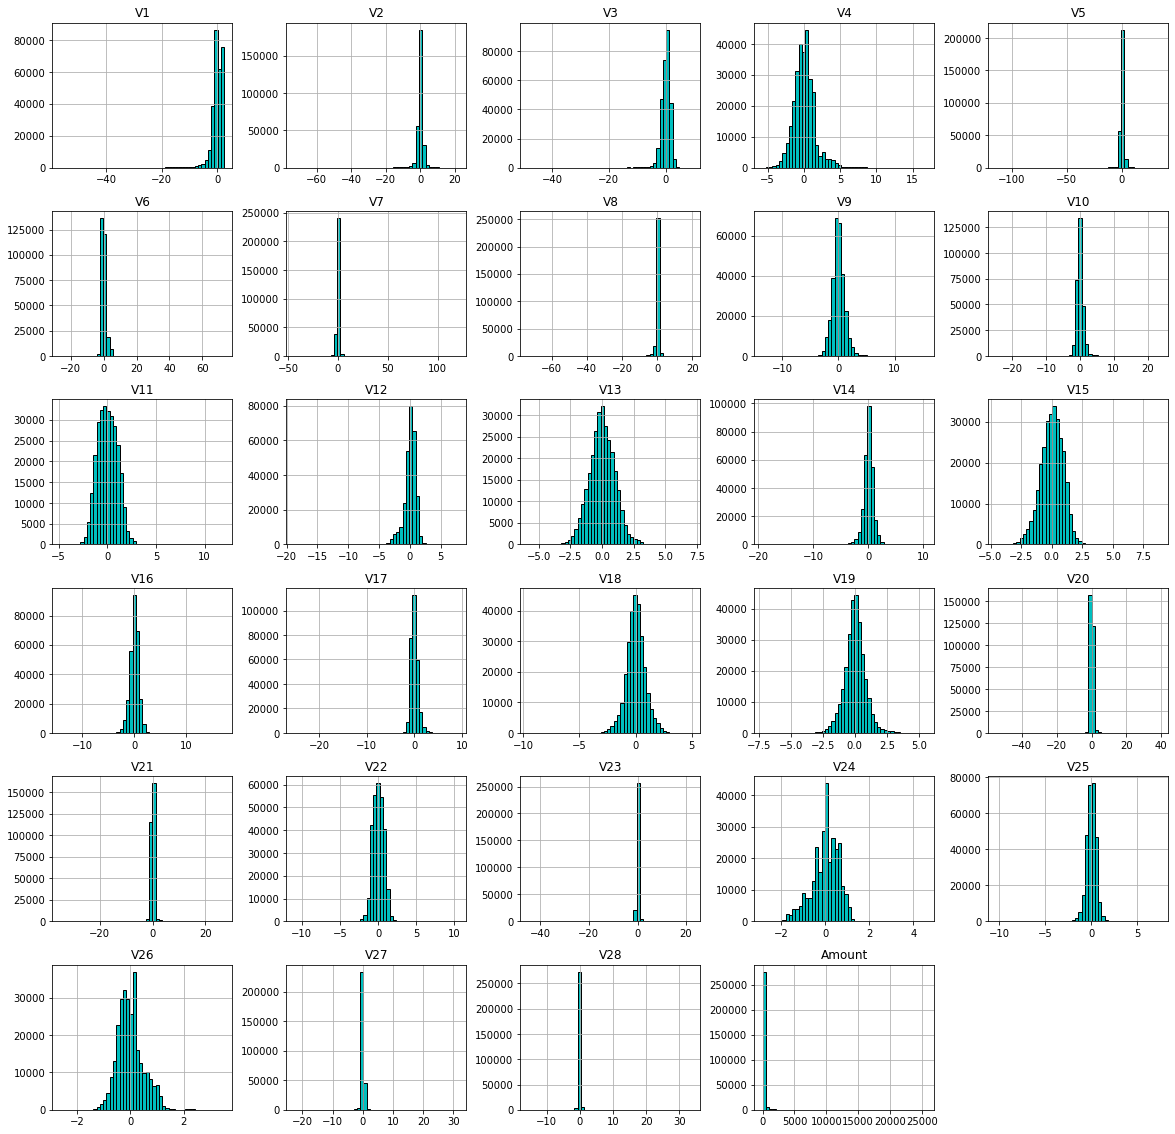

In [64]:
#decouvrir les datas
df_hist = data2.drop(['Time', 'Class'], 1)
df_hist.hist(figsize=(20,20), bins = 50, color = "c", edgecolor='black')
plt.show()

## Préparation du jeu de données

In [65]:
# récupération des transactions aberrantes (classe 1) 
index0 = data2[data2["Class"] == 0 ].index
data_aber_pre = data2.drop(index0)
#eliminer colonne "Time"
data_aber=data_aber_pre.drop(data_aber_pre.columns[[0]],axis=1)
print(np.shape(data_aber))
data_aber.head()

(492, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [66]:
# récupération des transactions normales (classe 0) 
index1 = data2[data2["Class"] == 1 ].index
data_norm_pre = data2.drop(index1)
#eliminer colonne "Time"
data_norm_tot=data_norm_pre.drop(data_norm_pre.columns[[0]],axis=1)
print(np.shape(data_norm_tot))
data_norm_tot.head()

(284315, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
# Garder aléatoirement 5000 transactions de cartes normales
data_norm = data_norm_tot.sample(n=5000)  
print(np.shape(data_norm))
data_norm.head()

(5000, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
187640,-3.665272,-0.455169,-1.477015,3.768484,3.949063,-2.153590,1.927396,-1.030901,-1.720434,0.754537,...,-0.377274,0.699967,0.452413,-0.199045,1.138838,0.359277,-0.799890,0.881858,1.00,0
251827,1.929152,0.424254,-0.855170,3.705941,0.542313,0.262234,0.039653,0.020764,-0.697310,1.487147,...,0.269576,0.803321,0.029760,0.588334,0.202534,0.223718,-0.042796,-0.048410,10.59,0
232175,-1.097267,1.408457,-1.428914,-0.281619,0.390259,-0.945629,0.338547,0.308069,-0.094735,-0.500918,...,0.415204,1.002402,-0.194995,-0.489067,-0.422533,-0.238119,-0.947900,-0.203122,14.80,0
21091,1.266526,-0.398332,0.181364,-0.341780,-0.834394,-0.777271,-0.459538,-0.114893,-0.727850,0.051953,...,-0.008498,-0.009855,0.027375,0.353319,0.366139,-0.296735,0.036569,0.044143,41.25,0
102207,-1.039854,0.469418,0.171986,-3.462066,1.429741,3.209864,-0.587141,1.435007,0.699007,-1.729366,...,0.028226,-0.070167,-0.230738,1.030737,0.521653,-0.046631,0.176531,0.066980,25.90,0


In [68]:
# Concaténation des transactions aberrantes et normales
data_comb = np.concatenate((data_aber, data_norm), axis=0)
data_comb=pd.DataFrame(data_comb)
# Mélange pour ne pas avoir les transactions aberrantes au début et les transactions normales à la fin
data_comb=data_comb.sample(frac=1).reset_index(drop=True)
data_comb.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.205225,-0.897476,-1.468417,-1.217347,-0.074105,0.066945,-0.641484,-0.085645,-0.465360,0.906556,...,0.178335,0.556709,-0.050772,-1.397367,0.100685,-0.095645,-0.017468,-0.076497,30.00,0.0
1,0.961389,-2.009811,0.396816,-1.288461,-1.913921,-0.202144,-1.027760,-0.025405,-1.820456,1.480295,...,0.128421,0.127473,-0.285617,0.013687,0.246152,-0.128421,-0.004871,0.059856,280.00,0.0
2,2.045864,0.116766,-1.803997,0.218902,0.684148,-0.289092,0.083836,-0.063182,0.202474,-0.227080,...,-0.323478,-0.836733,0.292756,0.135494,-0.250972,0.177140,-0.061439,-0.043636,1.29,0.0
3,-0.404670,0.676403,0.713179,-0.849673,0.508613,-0.964263,1.122566,-0.194900,0.046265,-0.950504,...,0.203017,0.738500,-0.398406,0.116574,0.196285,0.607770,0.048042,0.122932,11.50,0.0
4,1.041761,-2.150293,-1.144387,0.316098,-0.875446,0.482015,-0.181724,0.095686,1.291877,-0.262691,...,0.488414,0.451416,-0.323341,0.334980,-0.318098,0.048441,-0.089181,0.035103,500.00,0.0


## Détéction des anomalies avec Isolation Forest

In [69]:
#On ne donne pas la colonne class pour l'isoaltion Forest
data_noClass = data_comb.drop(data_comb.columns[[29]],axis=1)
clf = IsolationForest(random_state=0)
clf.fit(data_noClass.values)
dec2=clf.decision_function(data_noClass)
print(np.shape(dec2))

(5492,)


(array([  2.,   0.,   0.,   1.,   1.,   4.,   2.,   3.,   3.,   6.,  12.,
         14.,  11.,   8.,  17.,  25.,   5.,   4.,   1.,   2.,   5.,   7.,
          9.,  12.,  18.,  18.,  23.,  24.,  35.,  20.,  35.,  29.,  40.,
         36.,  42.,  36.,  45.,  74.,  81., 102., 137., 165., 243., 383.,
        520., 647., 748., 867., 795., 175.]),
 array([-0.28699571, -0.27795501, -0.2689143 , -0.25987359, -0.25083288,
        -0.24179218, -0.23275147, -0.22371076, -0.21467005, -0.20562934,
        -0.19658864, -0.18754793, -0.17850722, -0.16946651, -0.16042581,
        -0.1513851 , -0.14234439, -0.13330368, -0.12426297, -0.11522227,
        -0.10618156, -0.09714085, -0.08810014, -0.07905943, -0.07001873,
        -0.06097802, -0.05193731, -0.0428966 , -0.0338559 , -0.02481519,
        -0.01577448, -0.00673377,  0.00230694,  0.01134764,  0.02038835,
         0.02942906,  0.03846977,  0.04751047,  0.05655118,  0.06559189,
         0.0746326 ,  0.08367331,  0.09271401,  0.10175472,  0.11079543,
 

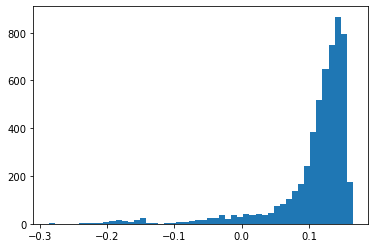

In [70]:
plt.hist(dec2,bins = 50)

#### Cet histogramme représente la quantité de transactions qui possède chaque score données par Isolation Forest.
#### On observe que presque toutes les transactions ont un score autour de 0.15 mais certaines transactions se démarques avec des scores plus faibles et sont donc potentiellement des fraudes
#### Nous avons choisis, d'après cet histogramme, que toutes les transactions avec un score en dessous de 0 correspondent à des fraudes

In [71]:
# On rajoute une colonne pour les class prédites (1 pour fraude et 0 pour normal)

# tous les scores inférieurs à -0.10 sont changés en 1 et ceux supérieurs en 0
list_dec2 = []
for i in dec2:
    if i < 0:
        list_dec2.append(1)
    if i >= 0:
        list_dec2.append(0)

# On rajoute une colonne aux données avec 1 pour les fraudes et 0 pour normal
list_dec2_np = np.array(list_dec2).reshape(-1,1)
data_dec2_cont = np.concatenate((data_comb, list_dec2_np), axis=1)
data_dec2_cont = pd.DataFrame(data_dec2_cont)
data_dec2_cont.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.205225,-0.897476,-1.468417,-1.217347,-0.074105,0.066945,-0.641484,-0.085645,-0.465360,0.906556,...,0.556709,-0.050772,-1.397367,0.100685,-0.095645,-0.017468,-0.076497,30.00,0.0,0.0
1,0.961389,-2.009811,0.396816,-1.288461,-1.913921,-0.202144,-1.027760,-0.025405,-1.820456,1.480295,...,0.127473,-0.285617,0.013687,0.246152,-0.128421,-0.004871,0.059856,280.00,0.0,0.0
2,2.045864,0.116766,-1.803997,0.218902,0.684148,-0.289092,0.083836,-0.063182,0.202474,-0.227080,...,-0.836733,0.292756,0.135494,-0.250972,0.177140,-0.061439,-0.043636,1.29,0.0,0.0
3,-0.404670,0.676403,0.713179,-0.849673,0.508613,-0.964263,1.122566,-0.194900,0.046265,-0.950504,...,0.738500,-0.398406,0.116574,0.196285,0.607770,0.048042,0.122932,11.50,0.0,0.0
4,1.041761,-2.150293,-1.144387,0.316098,-0.875446,0.482015,-0.181724,0.095686,1.291877,-0.262691,...,0.451416,-0.323341,0.334980,-0.318098,0.048441,-0.089181,0.035103,500.00,0.0,0.0


In [72]:
fraudes = data_dec2_cont[ data_dec2_cont[30] == 1 ].index
print("Avec l'isolation forest, nous trouvons",len(fraudes), "fraudes")

Avec l'isolation forest, nous trouvons 344 fraudes


## Matrice de confusion

In [75]:
from sklearn.metrics import confusion_matrix

y_true = data_dec2_cont[[29]]
y_pred = data_dec2_cont[[30]]
print("matrice de confusion:")
print(confusion_matrix(y_true, y_pred))
vp, fn, fp, vn = confusion_matrix(y_true, y_pred).ravel()
print("Les positifs correspondent aux transactions normales et les négatifs aux transactions frauduleuses")
print("Vrais prositifs :",vp)
print("Faux positifs :",fp)
print("Vrais négatifs :",vn)
print("Faux négatifs :",fn)

matrice de confusion:
[[4929   71]
 [ 219  273]]
Les positifs correspondent aux transactions normales et les négatifs aux transactions frauduleuses
Vrais prositifs : 4929
Faux positifs : 219
Vrais négatifs : 273
Faux négatifs : 71


#### Ce qui nous interesse est de trouver toutes les fraudes, donc d'avoir très peu de faux positifs.
#### Pour ce faire on peut calculer le rappel des négatifs et l'accuracy.

In [76]:
print("Rappel des négatifs:", vn/(vn+fp))
print("Accuracy:", (vp+vn)/5492)

Rappel des négatifs: 0.5548780487804879
Accuracy: 0.9471959213401311


#### Même si l'accuracy est bonne, le rappel est assez mauvais, il serait donc intéréssant de tester d'autres algorithmes ou d'avoir plus de données.